# Nearest Neighbor Heuristic

**Authors**: Ben Morris, Daniel Park, Jess Brown, Han Vakil

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from utils import random_graph
import math

In [36]:
"""
Docstring placeholder
"""

def tsp_nearest_neighbor(n, is_directed, is_complete):
    if is_directed:
        graph = random_graph(n, True)
    else:
        graph = random_graph(n)
    if not is_complete:
        for i in range(0, math.floor(n / 2)):
            edges_to_remove = random.sample(range(0,n-1), 2)
            graph.remove_edge(edges_to_remove[0], edges_to_remove[1])
    nx.draw_circular(graph)
    solution_path = []
    seen = set()
    length = 0
    start_city = 0
    print(f"Len graph is {len(graph)}")
    print(f"start city is {start_city}")
    curr_city = start_city
    all_cities_visited = False
    solution_path.append(start_city)
    seen.add(start_city)
    print(f"Solution path is {solution_path}")
    while len(seen) < len(graph):
        # Find nearest unvisited city and make that current city - add to solution path 
        nearest = find_nearest_city(curr_city, graph, seen)
        solution_path.append(nearest)
        seen.add(nearest)
        print(f"Solution path is {solution_path}")
        length += graph[curr_city][nearest]['weight']
        curr_city = nearest
    # Return to the start city once you have visited every city  
    solution_path.append(start_city)
    length += graph[curr_city][start_city]['weight']
    # Return path
    print(f"The solution path is {solution_path}")
    return length, solution_path

"""
Docstring placeholder
"""

def find_nearest_city(curr_city_index, graph, solution_path) -> int:
    return min((i for i in range(len(graph)) if i not in solution_path), key=lambda i: graph[curr_city_index][i]['weight'])

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 2]
Solution path is [0, 2, 7]
Solution path is [0, 2, 7, 1]
Solution path is [0, 2, 7, 1, 6]
Solution path is [0, 2, 7, 1, 6, 3]
Solution path is [0, 2, 7, 1, 6, 3, 8]
Solution path is [0, 2, 7, 1, 6, 3, 8, 4]
Solution path is [0, 2, 7, 1, 6, 3, 8, 4, 9]
Solution path is [0, 2, 7, 1, 6, 3, 8, 4, 9, 5]
The solution path is [0, 2, 7, 1, 6, 3, 8, 4, 9, 5, 0]
Shortest path is [0, 2, 7, 1, 6, 3, 8, 4, 9, 5, 0] with length 3.679


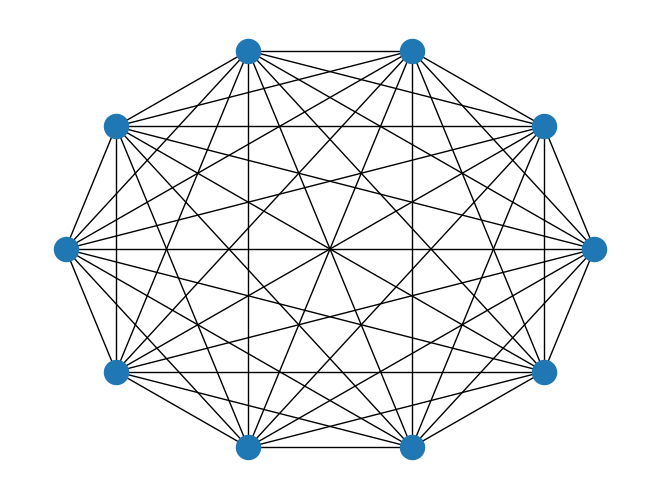

In [37]:
# Undirected, complete graph
length, path = tsp_nearest_neighbor(10, False, True)
print(f'Shortest path is {path} with length {length:.3f}')

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 2]
Solution path is [0, 2, 7]
Solution path is [0, 2, 7, 1]
Solution path is [0, 2, 7, 1, 9]
Solution path is [0, 2, 7, 1, 9, 8]
Solution path is [0, 2, 7, 1, 9, 8, 5]
Solution path is [0, 2, 7, 1, 9, 8, 5, 4]
Solution path is [0, 2, 7, 1, 9, 8, 5, 4, 3]
Solution path is [0, 2, 7, 1, 9, 8, 5, 4, 3, 6]
The solution path is [0, 2, 7, 1, 9, 8, 5, 4, 3, 6, 0]
Shortest path is [0, 2, 7, 1, 9, 8, 5, 4, 3, 6, 0] with length 2.865


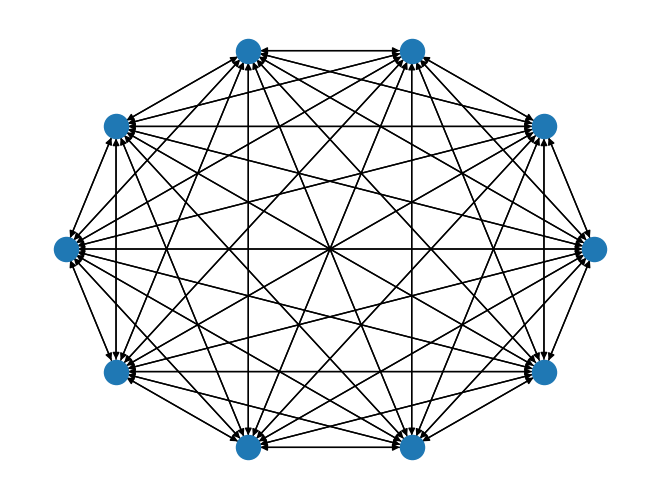

In [38]:
# Directed, complete
length, path = tsp_nearest_neighbor(10, True, True)
print(f'Shortest path is {path} with length {length:.3f}')

Len graph is 10
start city is 0
Solution path is [0]


KeyError: 4

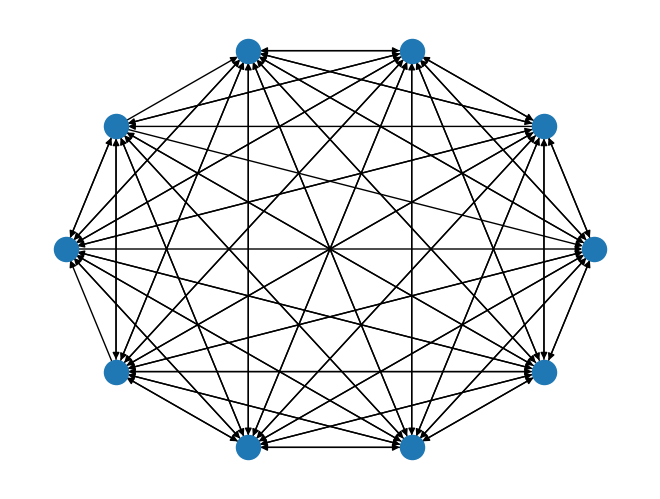

In [39]:
# Directed, incomplete
length, path = tsp_nearest_neighbor(10, True, False)
print(f'Shortest path is {path} with length {length:.3f}')